In [ ]:
"""
Purpose: To put the whole axon classificatoin steps 
together into one function that will labels
branches as axon-like, axon and error

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [199]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import proofreading_utils as pru

import preprocessing_vp2 as pre

# -- For the axon classification --

import neuron_searching as ns

import skeleton_utils as sk

import numpy_utils as nu

import networkx_utils as xu

import system_utils as su

# Importing Neuron

In [210]:
neuron_obj_file = "classic_double_neuron_1"

In [211]:
nru = reload(nru)
curr_neuron_obj = nru.decompress_neuron(neuron_obj_file,neuron_obj_file,
                                       suppress_output=True,
                                       debug_time=False)

Inside decompress neuron and decomposition_type = meshafterparty
Decompress pickle time = 0.419466495513916
Getting mesh time = 5.373567342758179
Passed faces original mesh check
Passed vertices original mesh check
Face and Vertices check time = 3.5762786865234375e-05
using precomputed soma_volume_ratios
Original Soma mesh time = 0.19947171211242676
Insignificant and Not-processed and glia time = 1.239776611328125e-05
Limb meshes time = 0.1742241382598877
Working on limb 0


  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
  Working on branch 5
  Working on branch 6
  Working on branch 7
  Working on branch 8
  Working on branch 9
  Working on branch 10
  Working on branch 11
  Working on branch 12
  Working on branch 13
  Working on branch 14
  Working on branch 15
  Working on branch 16
  Working on branch 17
  Working on branch 18
  Working on branch 19
  Working on branch 20
  Working on branch 21
  Working on branch 22
  Working on branch 23
  Working on branch 24
  Working on branch 25
  Working on branch 26
  Working on branch 27
  Working on branch 28
  Working on branch 29
  Working on branch 30
  Working on branch 31
  Working on branch 32
  Working on branch 33
  Working on branch 34
  Working on branch 35
  Working on branch 36
  Working on branch 37
  Working on branch 38
  Working on branch 39
  Working on branch 40
  Working on branch 41
  Working on branch 42
  Working on branch 4

  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
  Working on branch 5
  Working on branch 6
  Working on branch 7
  Working on branch 8
  Working on branch 9
  Working on branch 10
  Working on branch 11
  Working on branch 12
  Working on branch 13
  Working on branch 14
  Working on branch 15
  Working on branch 16
  Working on branch 17
  Working on branch 18
  Working on branch 19
  Working on branch 20
  Working on branch 21
  Working on branch 22
  Working on branch 23

Working on limb 2


  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
  Working on branch 5
  Working on branch 6
  Working on branch 7
  Working on branch 8
  Working on branch 9
  Working on branch 10
  Working on branch 11
  Working on branch 12
  Working on branch 13
  Working on branch 14
  Working on branch 15
  Working on branch 16
  Working on branch 17
  Working on branch 18
  Working on branch 19
  Working on branch 20
  Working on branch 21
  Working on branch 22
  Working on branch 23
  Working on branch 24

Working on limb 3


  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
  Working on branch 5
  Working on branch 6

Working on limb 4


  Working on branch 0

Working on limb 5


  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
  Working on branch 5

Limb Correspondence = 3.1969006061553955
calculating limb networks = 3.1680076122283936
Already have preprocessed data
--- 1) Finished unpacking preprocessed materials: 3.123283386230469e-05
total_edges = [['S0', 'L0'], ['S0', 'L1'], ['S0', 'L2'], ['S0', 'L3'], ['S0', 'L4'], ['S0', 'L5']]
--- 2) Finished creating neuron connectivity graph: 9.5367431640625e-05
Having to generate soma_meshes_face_idx because none in preprocessed data
--- 3a) Finshed generating soma_meshes_face_idx: 0.345684289932251
Using precomputed volume ratio
--- 3) Finshed generating soma objects and adding them to concept graph: 0.12450957298278809
--- 4a) Finshed generating curr_limb_meshes_face_idx: 1.2181758880615234
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7f98ba83b390>]}
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges objec

     Branch 2
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(3494, 3), faces.shape=(6889, 3))>
     Branch 3
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(1689, 3), faces.shape=(3285, 3))>
     Branch 4
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(2408, 3), faces.shape=(4721, 3))>
     Branch 5
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(6518, 3), faces.shape=(13045, 3))>
     Branch 6
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(1532, 3), faces.shape=(3041, 3))>
Working on Limb 4:
     Branch 0
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(1038, 3), faces.shape=(2040, 3))>
Working on Limb 5:
     Branch 0
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(2675, 3), faces.shape=(5281, 3))>
     Branch 1
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(5056, 3), faces.shape=(10200, 3))>
     Branch 2
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(5796, 3), faces.shape=(11583, 3))>
     Branch 3
     Branch 4
curr_branch.mesh = <trimesh.Tri

# Debugging the new spining

In [212]:
nviz.visualize_neuron(curr_neuron_obj,
                      limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [213]:
curr_neuron_obj.calculate_spines()

query = median_mesh_center > 115 and n_faces_branch>100
smoothness_threshold = 0.1
The median_mesh_center was requested and HAS already been calculated
functions_list = [<function median_mesh_center at 0x7f98d7db39d8>, <function n_faces_branch at 0x7f98d7db3f28>]
segment_name before cgal = L0_0



segment_name before cgal = L0_2



segment_name before cgal = L0_4



segment_name before cgal = L0_6



segment_name before cgal = L0_9



segment_name before cgal = L0_10



segment_name before cgal = L0_11



segment_name before cgal = L0_12



segment_name before cgal = L0_13



segment_name before cgal = L0_14



segment_name before cgal = L0_15



segment_name before cgal = L0_17



segment_name before cgal = L0_19



segment_name before cgal = L0_22



segment_name before cgal = L0_23



segment_name before cgal = L0_24



segment_name before cgal = L0_25



segment_name before cgal = L0_26



segment_name before cgal = L0_27



segment_name before cgal = L0_28



segment_name before cgal = L0_29



segment_name before cgal = L0_30



segment_name before cgal = L0_31



segment_name before cgal = L0_32



segment_name before cgal = L0_33



segment_name before cgal = L0_34



segment_name before cgal = L0_35



segment_name before cgal = L0_36



segment_name before cgal = L0_37



segment_name before cgal = L0_39



segment_name before cgal = L0_40



segment_name before cgal = L0_41



segment_name before cgal = L0_42



segment_name before cgal = L0_43



segment_name before cgal = L0_44



segment_name before cgal = L0_46



segment_name before cgal = L1_0



segment_name before cgal = L1_1



segment_name before cgal = L1_2



segment_name before cgal = L1_5



segment_name before cgal = L1_6



segment_name before cgal = L1_7



segment_name before cgal = L1_8



segment_name before cgal = L1_10



segment_name before cgal = L1_11



segment_name before cgal = L1_15



segment_name before cgal = L1_17



segment_name before cgal = L1_18



segment_name before cgal = L1_19



segment_name before cgal = L1_20



segment_name before cgal = L1_22



segment_name before cgal = L1_23



segment_name before cgal = L2_0



segment_name before cgal = L2_1



segment_name before cgal = L2_2



segment_name before cgal = L2_3



segment_name before cgal = L2_5



segment_name before cgal = L2_7



segment_name before cgal = L2_10



segment_name before cgal = L2_11



segment_name before cgal = L2_17



segment_name before cgal = L2_18



segment_name before cgal = L2_19



segment_name before cgal = L2_20



segment_name before cgal = L2_21



segment_name before cgal = L2_22



segment_name before cgal = L2_24



segment_name before cgal = L3_0



segment_name before cgal = L3_1



segment_name before cgal = L3_2



segment_name before cgal = L3_3



segment_name before cgal = L3_4



segment_name before cgal = L3_5



segment_name before cgal = L3_6



segment_name before cgal = L4_0



segment_name before cgal = L5_0



segment_name before cgal = L5_1



segment_name before cgal = L5_2



segment_name before cgal = L5_4



segment_name before cgal = L5_5


In [214]:
nviz.plot_spines(curr_neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [220]:
ret_col = nviz.visualize_neuron(curr_neuron_obj,
                                visualize_type=["mesh"],
                     limb_branch_dict=dict(L2="all"),
                     return_color_dict=True)


 Working on visualization type: mesh


In [223]:
curr_branch = curr_neuron_obj[2][2]

In [225]:
curr_branch.spine_density

0.0002684763516506638

In [222]:
nviz.plot_branch_spines(curr_neuron_obj[2][2])

No limb name was given so using L2 because was the limb in the first key


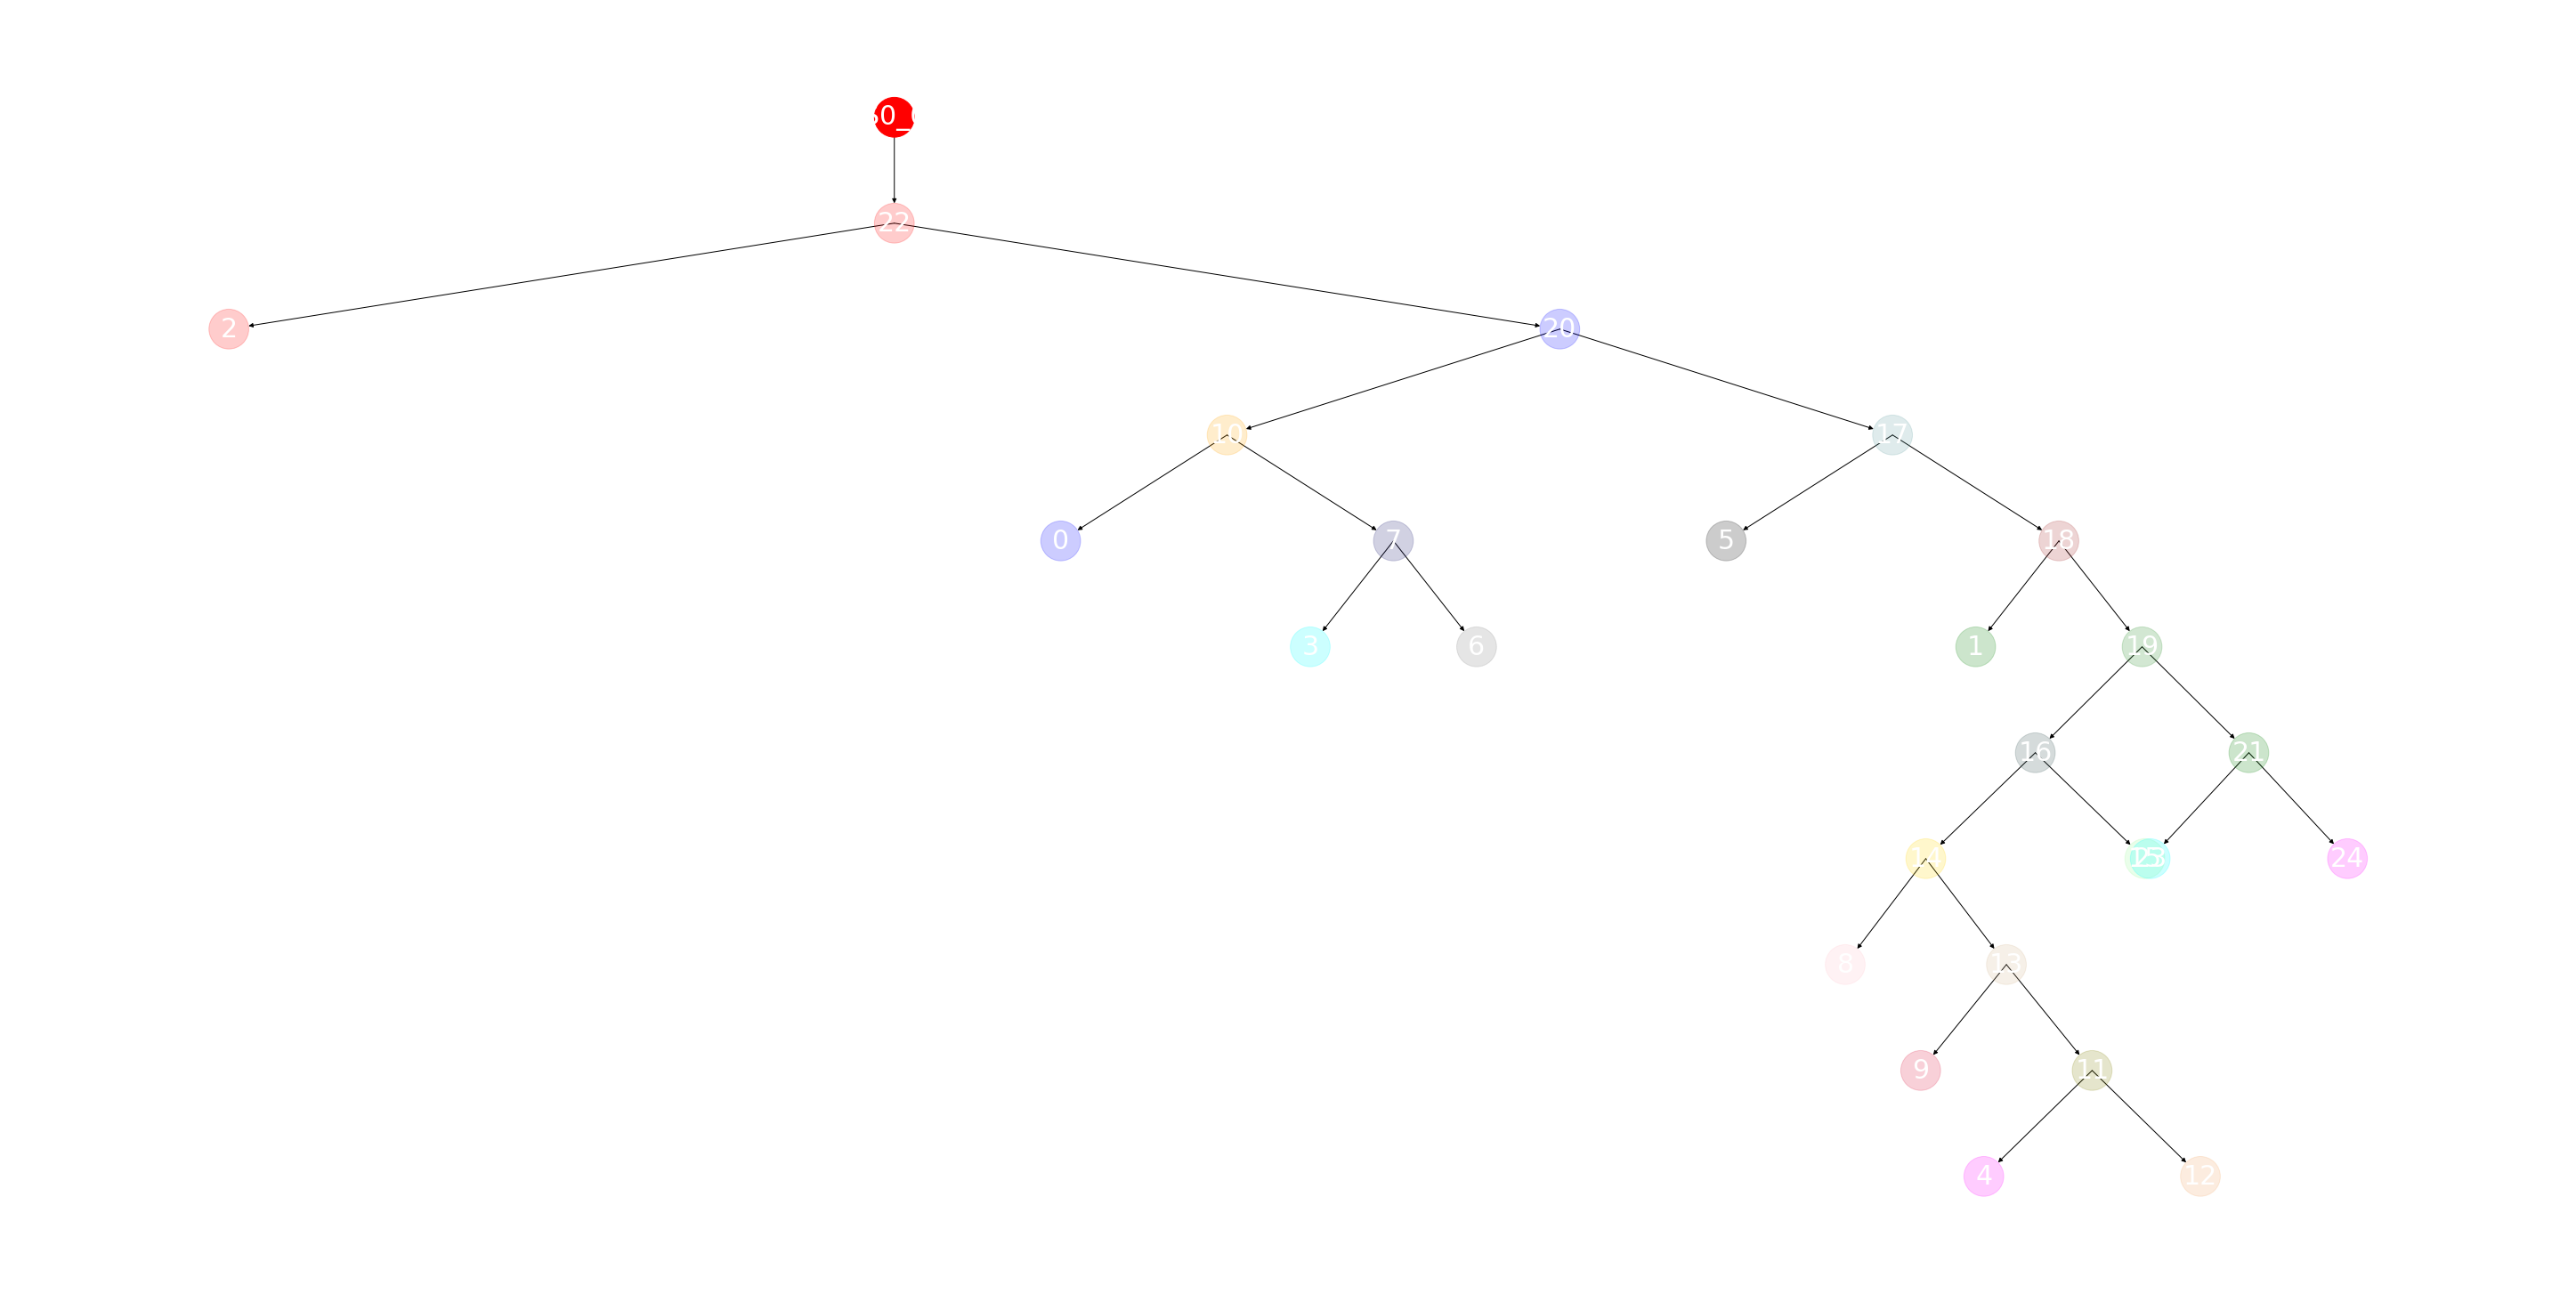

In [221]:
nviz.plot_limb_concept_network_2D(curr_neuron_obj,
                                   node_colors=ret_col)

# Getting another neuron from database

In [32]:
minnie,_ = du.configure_minnie_vm()

In [45]:
import test_neurons as tn
segment_id = tn.big_run_long_axon[0]
segment_id

864691137196923969

In [120]:
seg_ids_to_test = (minnie.Decomposition() & "n_limbs > 5" & "n_error_limbs = 0").fetch("segment_id")
seg_ids_to_test

array([864691134800773453, 864691134835275642, 864691134879633410, ...,
       864691135718463537, 864691135718467377, 864691135718469681])

In [179]:
segment_id = 864691134884745466 #worked for this one
#segment_id = 864691134884742906 #worked
segment_id = 864691134884744698
segment_id = 864691134884741370
segment_id = seg_ids_to_test[-3000]
segment_id

864691135578531524

In [180]:
curr_neuron_obj = (minnie.Decomposition() & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [181]:
nviz.visualize_neuron(curr_neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [182]:
ret_col = nviz.visualize_neuron(curr_neuron_obj,
                     visualize_type=["mesh"],
                     limb_branch_dict="all",
                     mesh_resolution="limb",
                                return_color_dict=True)




 Working on visualization type: mesh


In [183]:
# ret_col = nviz.visualize_neuron(curr_neuron_obj,
#                      visualize_type=["mesh","skeleton"],
#                      limb_branch_dict=dict(L1="all"),
#                                return_color_dict=True)

In [184]:
# nviz.plot_limb_concept_network_2D(curr_neuron_obj,
#                                  node_colors=ret_col)

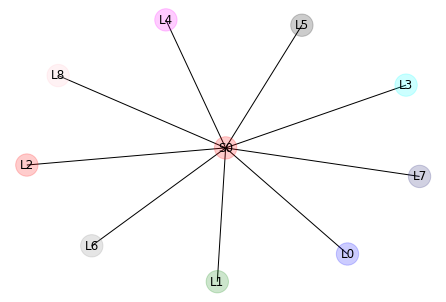

In [185]:
nviz.plot_soma_limb_concept_network(curr_neuron_obj,
                                   node_colors=ret_col)

# Running the Axon Classification

In [186]:
import classification_utils as clu

axon_limb_branch_dict,error_limb_branch_dict = clu.axon_classification(curr_neuron_obj,
                   verbose=True,
                    plot_axons=True,
                   plot_axon_errors=True,
                    error_width_max=200)

current_query = (n_spines < 4 and (median_mesh_center < 600) and skeleton_distance_branch <= 25000) or (skeleton_distance_branch > 15000 and (median_mesh_center < 600) and spines_per_skeletal_length < 0.00007)
functions_list = [<function width at 0x7f98d7823400>, <function median_mesh_center at 0x7f98d78230d0>, <function n_spines at 0x7f98d78231e0>, <function n_faces_branch at 0x7f98d5d28ae8>, <function skeleton_distance_branch at 0x7f98d7823048>, <function spines_per_skeletal_length at 0x7f98d78237b8>, <function no_spine_median_mesh_center at 0x7f98d7823488>]
functions_list = [<function axon_segment at 0x7f98d787a1e0>]

Part 1: Axon like branchese 
{'L1': array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 25]), 'L2': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34,
       35, 39, 41]), 'L4': array([3, 5, 7]), 'L6': array([ 3,  5,  6,  7,  8,  9, 11]), 'L8': array([0])}
functions_list = [<f

functions_list = [<function labels_restriction at 0x7f98d7823730>, <function median_mesh_center at 0x7f98d78230d0>]

 Working on visualization type: mesh



 Working on visualization type: mesh


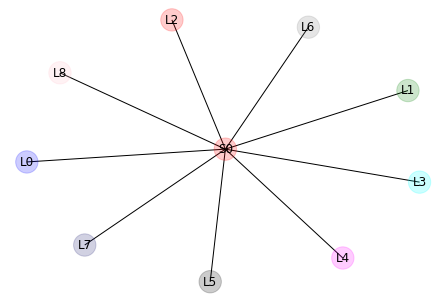

In [187]:
ret_col = nviz.visualize_neuron(curr_neuron_obj,
                     visualize_type=["mesh"],
                     limb_branch_dict="all",
                     mesh_resolution="limb",
                                return_color_dict=True)

nviz.plot_soma_limb_concept_network(curr_neuron_obj,
                                   node_colors=ret_col)

In [189]:
ret_col = nviz.visualize_neuron(curr_neuron_obj,
                                visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L1="all"),
                               return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L1 because was the limb in the first key


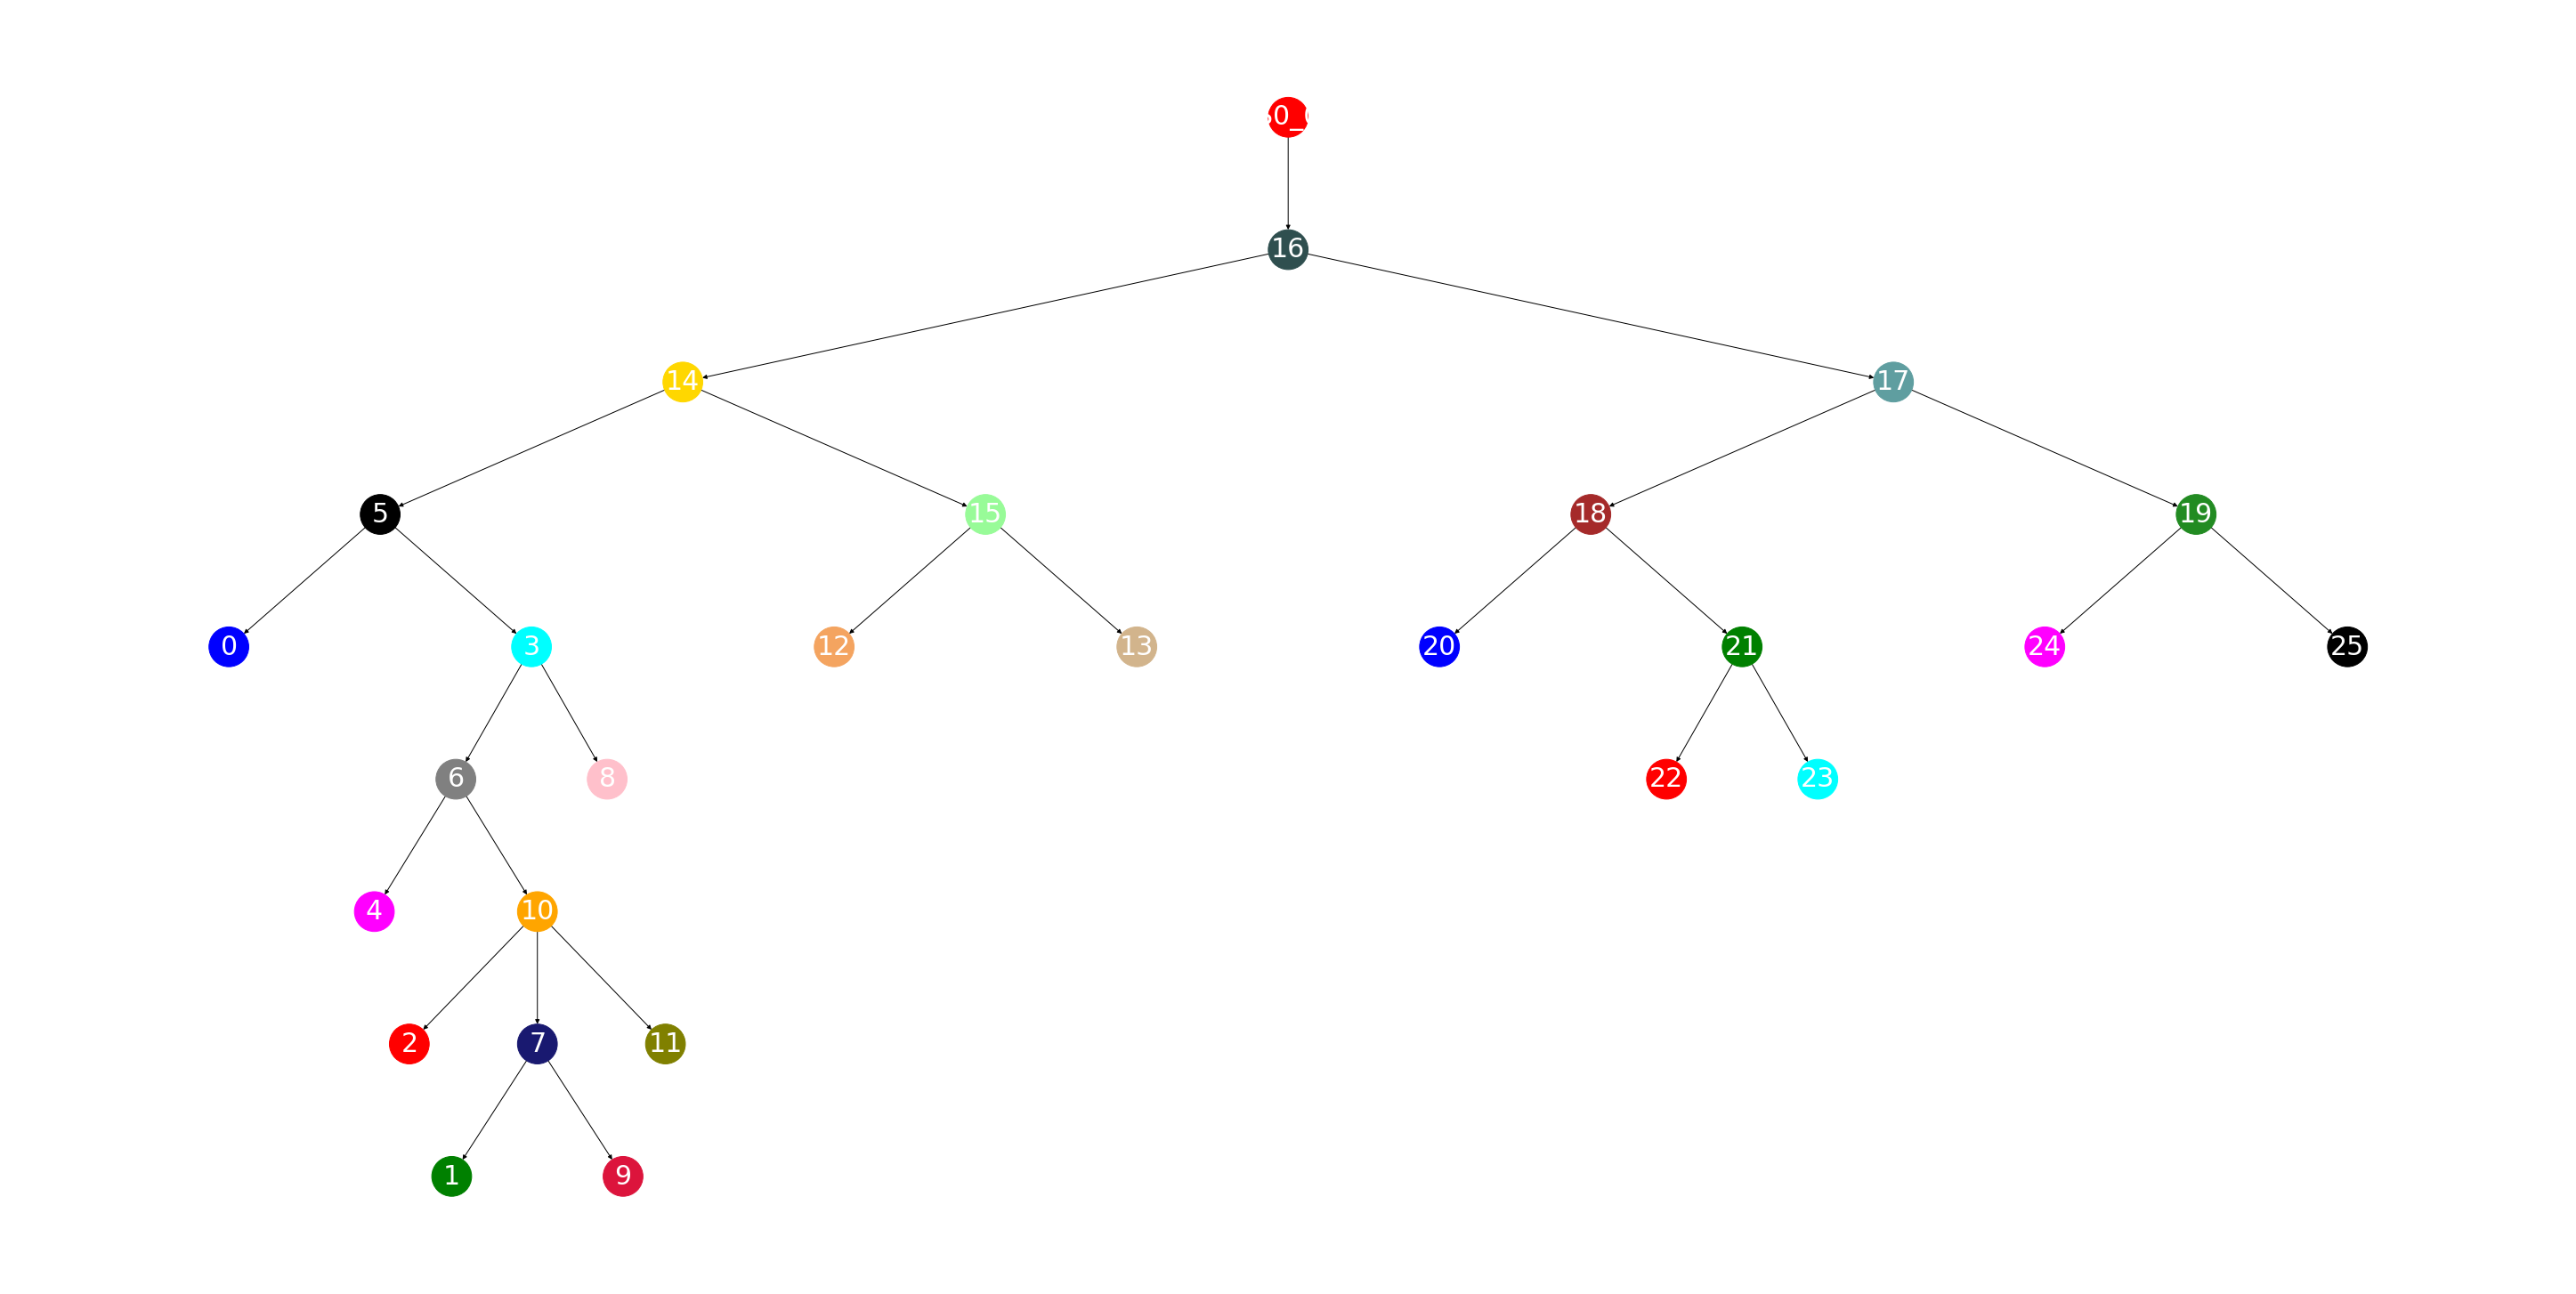

In [190]:
nviz.plot_limb_concept_network_2D(curr_neuron_obj,
                                   node_colors=ret_col)

In [191]:
ex_branch = curr_neuron_obj[1][25]

In [192]:
ex_branch.width_new

{'median_mesh_center': 134.24769837942708,
 'no_spine_median_mesh_center': 134.24769837942708}

In [193]:
ex_branch.n_spines

0

In [149]:
sk.calculate_skeleton_distance(ex_branch.skeleton)

18087.053330393166

In [150]:
import skeleton_utils as sk
len(ex_branch.spines)/sk.calculate_skeleton_distance(ex_branch.skeleton)

0.0

In [142]:
3/15000

0.0002

In [140]:
nviz.plot_objects(ex_branch.mesh,
                 meshes=ex_branch.spines,
                 meshes_colors="red")